# Text Analysis

In this lab we'll do a short text analysis so that you start to become familiar with the packages and tools available to you in Python to work with text data. Nothing here will be very in-depth - it's supposed to be able to be completed in a short period of time after all. But, it will give you a starting point for your final assignment and projects, should you want to analyze text data.

## Data Science Question
In this short project, we're going to answer the question: *For each presidential inauguration, which word is most unique?* 

To do this, we'll use the text from each Inaugural address in American history and carry out a TF-IDF analaysis.

Secondarily, we'll think about whether these words make sense in the context of the history at the time and visualize words uniqueness over the course of history.

# Part I : Setup & Data Wrangling

This lab uses a number of different functions across multiple packages. **Run the following code cell and take a look at each package we'll be using below. Make sure you understand what the package is used for. Be sure to familiarize yourself with anything that you're not yet familiar with.**

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

# Import nltk package 
# NLTK provides support for a wide variety of text processing tasks: 
# tokenization, stemming, proper name identification, part of speech identification, etc. 
#   PennTreeBank word tokenizer 
#   English language stopwords
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# scikit-learn imports
#   TF-IDF Vectorizer that first removes widely used words in the dataset and then transforms test data
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# import re for regular expression
import re

## seaborn for plotting
import seaborn as sns
sns.set(font_scale=1.2, style="white")

# import matplotlib for plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# set plotting size parameter
plt.rcParams['figure.figsize'] = (12, 5)

# improve resolution
%config InlineBackend.figure_format ='retina'

To get started on your text analysis using the `nltk` package, run the code below to **download the NLTK English tokenizer ('punkt'), stopwords of all languages ('stopwords') from `nltk`, and the inaugural dataset from `nltk` ('inaugural')**. To determine what code you'll need to do this, you can explore the `download` method [here](https://www.nltk.org/) or their book [here](http://www.nltk.org/book/).

In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('inaugural')

[nltk_data] Downloading package punkt to /home/isgonzal/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/isgonzal/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package inaugural to
[nltk_data]     /home/isgonzal/nltk_data...
[nltk_data]   Unzipping corpora/inaugural.zip.


True

Now that you have downloaded a few of the datasets you'll need, **import the `inaugural` dataset from `nltk.corpus`.**

In [4]:
# YOUR CODE HERE
from nltk.corpus import inaugural

In [5]:
assert inaugural

If all is working well, the following cell should display the files included in this dataset. 

In [6]:
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

As you can see there is one file from each address. And, you'll note that the filename includes the year of each address. We'll want to use that address later, so **write code that extracts each year from the filename and stores it as a list. Assign this list to the variable `years`.**  

In [14]:
# YOUR CODE HERE
years = [fileid[:4] for fileid in inaugural.fileids()]
years

['1789',
 '1793',
 '1797',
 '1801',
 '1805',
 '1809',
 '1813',
 '1817',
 '1821',
 '1825',
 '1829',
 '1833',
 '1837',
 '1841',
 '1845',
 '1849',
 '1853',
 '1857',
 '1861',
 '1865',
 '1869',
 '1873',
 '1877',
 '1881',
 '1885',
 '1889',
 '1893',
 '1897',
 '1901',
 '1905',
 '1909',
 '1913',
 '1917',
 '1921',
 '1925',
 '1929',
 '1933',
 '1937',
 '1941',
 '1945',
 '1949',
 '1953',
 '1957',
 '1961',
 '1965',
 '1969',
 '1973',
 '1977',
 '1981',
 '1985',
 '1989',
 '1993',
 '1997',
 '2001',
 '2005',
 '2009',
 '2013',
 '2017']

In [12]:
assert len(years) == len(inaugural.fileids())
assert years[1] == '1793'

Let's take a look at one of these addresses. We'll pick a short one - Washington's *second* address. **Run the code below to take a look.**

In [13]:
# see Washington's Second Inaugural Address
inaugural.raw('1793-Washington.txt')

'Fellow citizens, I am again called upon by the voice of my country to execute the functions of its Chief Magistrate. When the occasion proper for it shall arrive, I shall endeavor to express the high sense I entertain of this distinguished honor, and of the confidence which has been reposed in me by the people of united America.\n\nPrevious to the execution of any official act of the President the Constitution requires an oath of office. This oath I am now about to take, and in your presence: That if it shall be found during my administration of the Government I have in any instance violated willingly or knowingly the injunctions thereof, I may (besides incurring constitutional punishment) be subject to the upbraidings of all who are now witnesses of the present solemn ceremony.\n\n \n'

You'll notice that there are some new line characters, as well as a colon, some commas, some periods. We're really only interested in the words though for TF-IDF, so let's remove all punctuation. **Write code that returns a list (`text`), where each element in the list includes the text as above, but with:
- punctuation removed 
- each word separated by a space
- all words are lower case (i.e. "Constitution" should be "constitution)

Assign this to the variable `text`.

In [22]:
# YOUR CODE HERE
text = [re.sub(r'[^A-Za-z0-9]', ' ', x) for x in [inaugural.raw(fileid) for fileid in inaugural.fileids()]]
text = list(map(str.lower, text))

In [23]:
assert isinstance(text, list)
assert len(text) == 58
out = re.search('^fellow',text[0])
assert out != None

If you've done this correctly and you **run the following cell, all punctuation should be stripped from the text, so that you only see the words from Washington's second address, separated by spaces, with all words lowercase.**

In [24]:
text[1]

'fellow citizens  i am again called upon by the voice of my country to execute the functions of its chief magistrate  when the occasion proper for it shall arrive  i shall endeavor to express the high sense i entertain of this distinguished honor  and of the confidence which has been reposed in me by the people of united america   previous to the execution of any official act of the president the constitution requires an oath of office  this oath i am now about to take  and in your presence  that if it shall be found during my administration of the government i have in any instance violated willingly or knowingly the injunctions thereof  i may  besides incurring constitutional punishment  be subject to the upbraidings of all who are now witnesses of the present solemn ceremony     '

With that, you now have a dataset ready for analysis by TF-IDF!

# Part II : Text Analysis

To get started on your TF-IDF analysis, you'll first want to **create a `TfidfVectorizer` object to transform your text data into vectors. Assign this `TfidfVectorizer` object to `tfidf`.**

In this object, you'll need to **pass five arguments to initialize `tfidf`**: 
* set to apply TF scaling: `sublinear_tf=True`
* analyze at the word-level: `analyzer='word'`
* set maximum number of unique words: ` max_features=2000`
* specify that you want to tokenize the data using the word_tokenizer from NLTK: `tokenizer=word_tokenize`
* remove English language stop words: `stop_words=stopwords.words("english")`

In [34]:
# YOUR CODE HERE
tfidf = TfidfVectorizer(
        sublinear_tf=True,
        analyzer = 'word',
        max_features = 2000,
        tokenizer = word_tokenize,
        stop_words = stopwords.words("english")
)

In [35]:
assert tfidf.analyzer == 'word'
assert tfidf.max_features == 2000
assert tfidf.tokenizer == word_tokenize

Now, it's time to calculate TF-IDF for words across our corpus of Inaugural addresses! 

To do this:

1. generate a DataFrame `inaug_tfidf` using the `tfidf.fit_transform` function to calculate TF-IDF on your `text` variable. 
2. Be sure that your index here is the year of the address and the columns are named with the columns of the words the values represent. The `get_feature_names` method from `tfidf` may help you accomplish the columns name assignment. And the `years` you created earlier may help you with the indices.

In [36]:
# YOUR CODE HERE
inaug_tfidf = pd.DataFrame(tfidf.fit_transform(text).toarray())
inaug_tfidf.columns = tfidf.get_feature_names()
inaug_tfidf.rows = years

/opt/conda/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/tmp/ipykernel_567/3608019792.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  inaug_tfidf.rows = years


In [37]:
assert len(inaug_tfidf.index) == len(years)
assert len(inaug_tfidf.columns) == 2000
assert inaug_tfidf.shape == (58, 2000)

# Part 3: Results

We're almost there. We now have a DataFrame that includes the TF-IDF for the top 2000 words in our corpus! **Now, you'll want to extract the single most unique word from each address. Assign this information (most likely a Series object) to the variable `most_unique`.**

In [39]:
# YOUR CODE HERE
most_unique = inaug_tfidf.idxmax(axis=1)
most_unique

0            article
1            thereof
2             houses
3            trusted
4              false
5       improvements
6            british
7              naval
8     fortifications
9         instituted
10         generally
11        intentions
12          supposed
13             roman
14             texas
15            purity
16          apparent
17            whilst
18          minority
19            slaves
20            dollar
21       proposition
22           dispute
23             negro
24          partisan
25            ballot
26          activity
27             loans
28           islands
29             tasks
30        interstate
31           process
32           counsel
33      relationship
34            stands
35       enforcement
36            helped
37           despair
38            speaks
39           learned
40           program
41      productivity
42           peoples
43             sides
44          covenant
45            voices
46              role
47           

Take a look through this list of most unique words over time. Do they make sense based on what you know about American history? Do any surprise you?

With that part of our Analysis done, one thing that stuck out to me in this list is the fact that "british" was the most unique word to the 1813 inaugural address. This made sense to me - it was early in American history and we had only recently left British rule. But, I was curious to see whether or not 'british' would show up uniquely (albeit less uniquely) in any later addresses. **Generate a line plot that plots the TF-IDF for the word "british" on the y-axis. Plot year on the x-axis.**

Text(0, 0.5, 'tfidf')

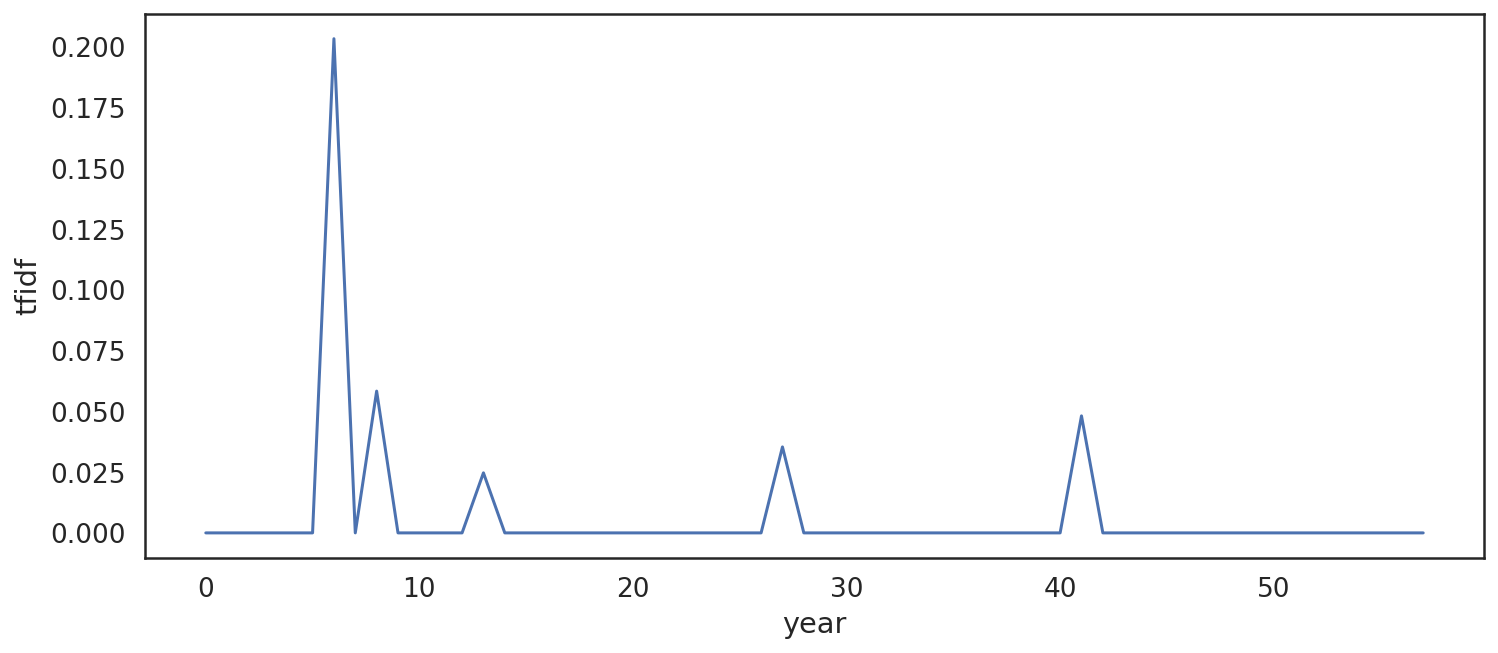

In [40]:
y = inaug_tfidf.index
plt.plot(y, inaug_tfidf['british'])
plt.xlabel('year')
plt.ylabel('tfidf')

Here you should see that over time "british" peaked in inaugural addresses at a few interesting points throughout history. What about some other words?

Using a similar approach, **plot TF-IDF for "british", "america", "war", and "jobs". Take a look at the trends over time. Feel free to look at other words' trends over time.**

Text(0, 0.5, 'tfidf')

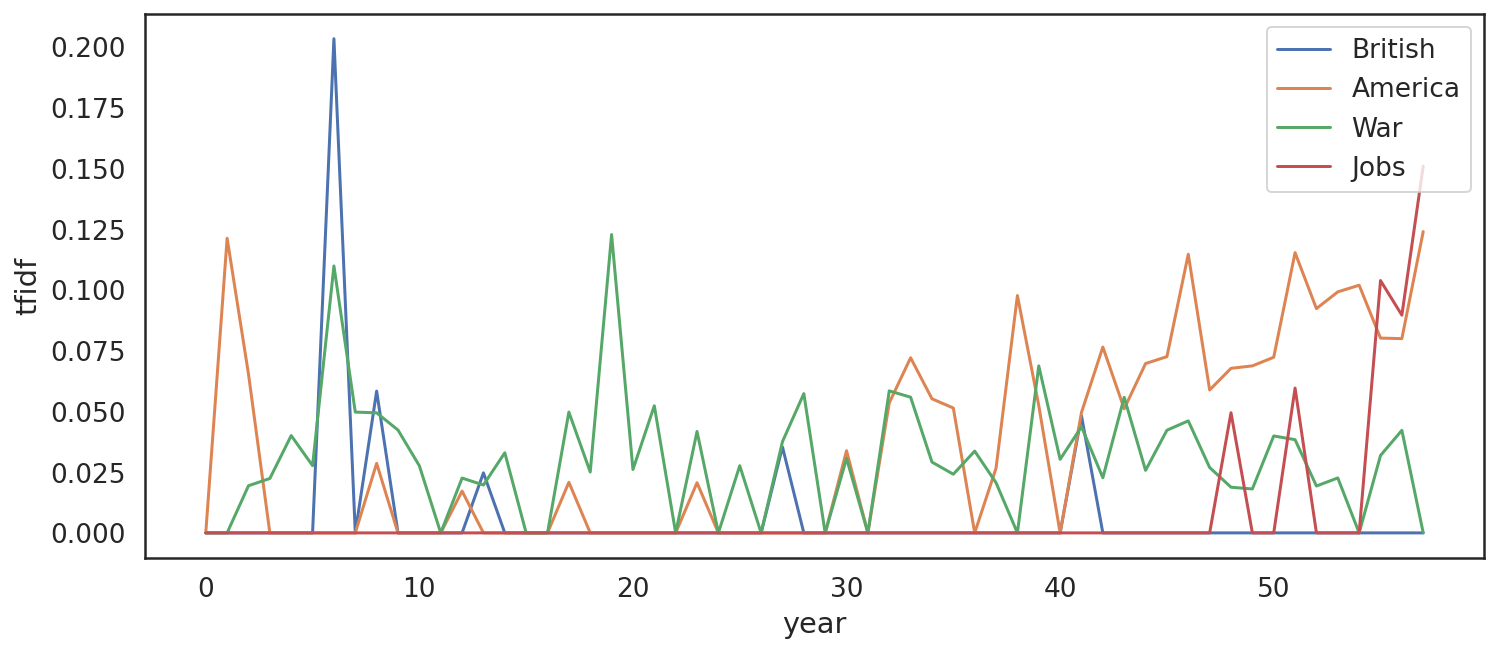

In [42]:
y = inaug_tfidf.index
plt.plot(y, inaug_tfidf['british'], label = "British")
plt.plot(y, inaug_tfidf['america'], label = "America")
plt.plot(y, inaug_tfidf['war'], label = "War")
plt.plot(y, inaug_tfidf['jobs'], label = "Jobs")
plt.legend(loc = 'upper right')
plt.xlabel('year')
plt.ylabel('tfidf')

You should see that the mention of "america" happened frequently in the country's infancy, but then became less common, whereas "british was really common early on and "jobs" has really only become applicable in recent innaugural addresses.

As with all analysis, TF-IDF is not without its limitations. Let's take a look at how our results change if we change the `max_features` result in our analysis above to include 4000 words (rather than 2000). **Redo the analysis to 1) calculate TF-IDF for these 4000 words, 2) identify the word with the highest TF-IDF in each year (assignt his to `most_unique_4000`, and 3) generate a dataframe with the most common word from each analysis.Then, take a look to see how changing one argument in your analysis can affect your results! Finally, you can regenerate line plots if you're interseted to see how your plots have changed in this new analysis.**

In [43]:
tfidf2 = TfidfVectorizer(
        sublinear_tf=True,
        analyzer = 'word',
        max_features = 4000,
        tokenizer = word_tokenize,
        stop_words = stopwords.words("english")
)

In [44]:
inaug2_tfidf = pd.DataFrame(tfidf.fit_transform(text).toarray())
inaug2_tfidf.columns = tfidf.get_feature_names()
inaug2_tfidf.rows = years
inaug2_tfidf.head()

/tmp/ipykernel_567/2189687752.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  inaug2_tfidf.rows = years


000   abandon  abiding  ability     able    abroad  absolute  abundant  \
0  0.0  0.000000      0.0      0.0  0.00000  0.000000  0.000000       0.0   
1  0.0  0.000000      0.0      0.0  0.00000  0.000000  0.000000       0.0   
2  0.0  0.000000      0.0      0.0  0.00000  0.033155  0.000000       0.0   
3  0.0  0.053757      0.0      0.0  0.00000  0.038247  0.051645       0.0   
4  0.0  0.000000      0.0      0.0  0.03621  0.000000  0.000000       0.0   

     abuses  accept  ...     would  written    wrong      year     years  yes  \
0  0.000000     0.0  ...  0.023013  0.00000  0.00000  0.000000  0.025519  0.0   
1  0.000000     0.0  ...  0.000000  0.00000  0.00000  0.000000  0.000000  0.0   
2  0.043131     0.0  ...  0.029640  0.00000  0.00000  0.051108  0.040738  0.0   
3  0.084244     0.0  ...  0.056379  0.00000  0.06172  0.000000  0.000000  0.0   
4  0.071800     0.0  ...  0.041072  0.04095  0.00000  0.050249  0.032314  0.0   

        yet  yield  young      zeal  
0  0.000000    0.0    0.0  0.000000  
1  0.000000    0.0    0.0  0.000000  
2  0.000000    0.0    0.0  0.044769  
3  0.046212    0.0    0.0  0.051645  
4  0.039386    0.0    0.0  0.092373  

[5 rows x 2000 columns]

In [46]:
most_unique2 = inaug2_tfidf.idxmax(axis=1)

In [47]:
pd.concat([most_unique, most_unique2], axis = 1)

0               1
0          article         article
1          thereof         thereof
2           houses          houses
3          trusted         trusted
4            false           false
5     improvements    improvements
6          british         british
7            naval           naval
8   fortifications  fortifications
9       instituted      instituted
10       generally       generally
11      intentions      intentions
12        supposed        supposed
13           roman           roman
14           texas           texas
15          purity          purity
16        apparent        apparent
17          whilst          whilst
18        minority        minority
19          slaves          slaves
20          dollar          dollar
21     proposition     proposition
22         dispute         dispute
23           negro           negro
24        partisan        partisan
25          ballot          ballot
26        activity        activity
27           loans           loans
28         islands         islands
29           tasks           tasks
30      interstate      interstate
31         process         process
32         counsel         counsel
33    relationship    relationship
34          stands          stands
35     enforcement     enforcement
36          helped          helped
37         despair         despair
38          speaks          speaks
39         learned         learned
40         program         program
41    productivity    productivity
42         peoples         peoples
43           sides           sides
44        covenant        covenant
45          voices          voices
46            role            role
47           dream           dream
48    productivity    productivity
49         nuclear         nuclear
50            word            word
51         renewal         renewal
52         century         century
53           story           story
54         tyranny         tyranny
55            jobs            jobs
56         journey         journey
57            jobs            jobs

Text(0, 0.5, 'tfidf')

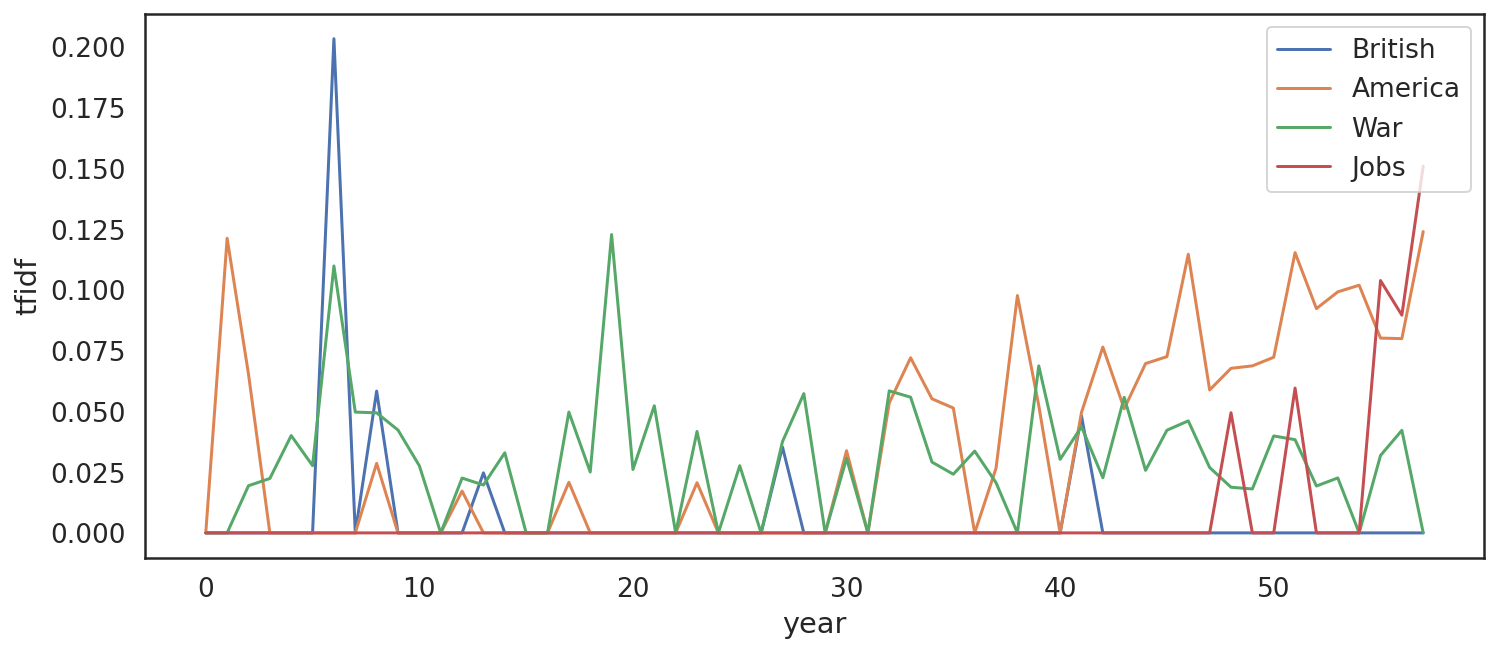

In [48]:
y = inaug2_tfidf.index
plt.plot(y, inaug2_tfidf['british'], label = "British")
plt.plot(y, inaug2_tfidf['america'], label = "America")
plt.plot(y, inaug2_tfidf['war'], label = "War")
plt.plot(y, inaug2_tfidf['jobs'], label = "Jobs")
plt.legend(loc = 'upper right')
plt.xlabel('year')
plt.ylabel('tfidf')

Good work getting comfortable working with text data here...and hopefully learning a bit more about Inaugural Addresses over time. Go ahead and submit your discussion lab!